<center><h1 style="color:green;"> HandWritten Alphabet Recognition </h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("A_Z Handwritten Data.csv")
df.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [3]:
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

### Preprocessing

In [4]:
# dependent variable
y = df['0']
del df['0']

In [5]:
import string
x = y.replace([i for i in range(26)], list(string.ascii_uppercase))
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

<Figure size 1200x1000 with 0 Axes>

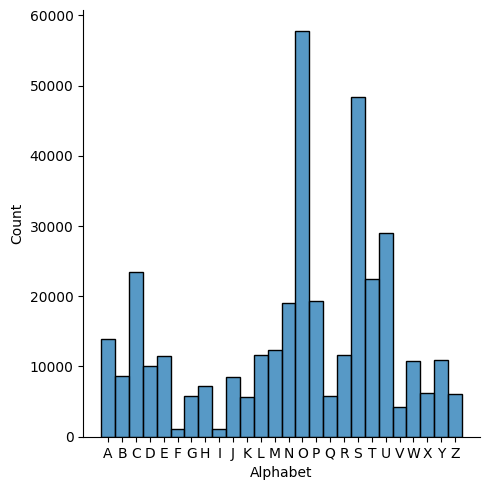

In [6]:
plt.figure(figsize=(12, 10))
sns.displot(x)
plt.xlabel("Alphabet")
plt.show()

In [7]:
from imblearn.under_sampling  import NearMiss

In [8]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

<Figure size 1200x1000 with 0 Axes>

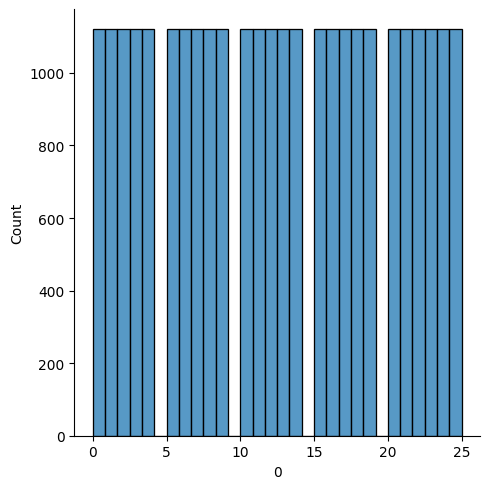

In [9]:
plt.figure(figsize= (12, 10))
sns.displot(y_data)
plt.show()

In [10]:
from keras.utils import np_utils

In [11]:
y = np_utils.to_categorical(y_data)

num_classes = y.shape[1]
num_classes

26

In [12]:
y 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
y.shape, X_data.shape

((29120, 26), (29120, 784))

### Normalization

In [14]:
X_data = X_data/255

### Visualization

In [15]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1, 28, 28, 1)

In [16]:
X_data.shape

(29120, 28, 28, 1)

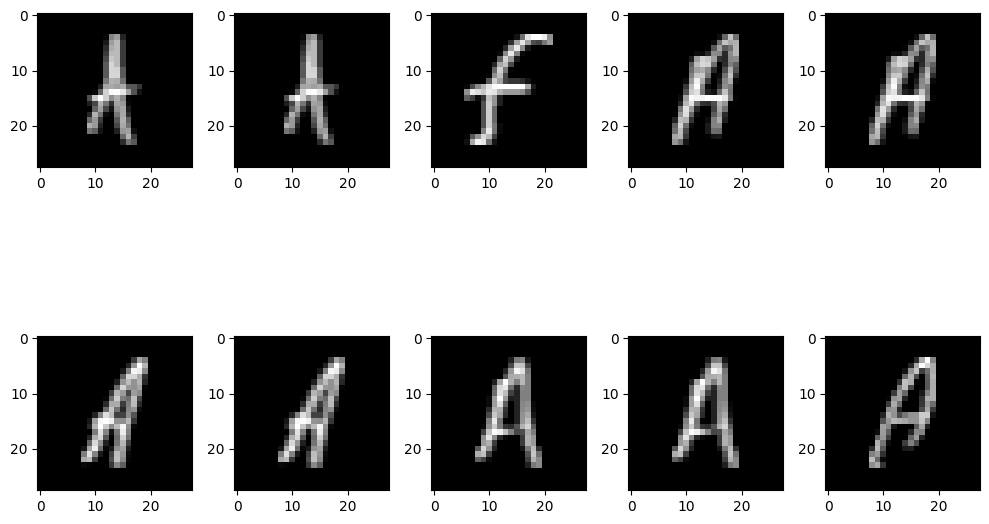

In [17]:
f, ax = plt.subplots(2, 5)
f.set_size_inches(10, 10)

k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_data[k], cmap='gray')
        k +=1
    plt.tight_layout()
        

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=10)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23296, 28, 28, 1) (5824, 28, 28, 1) (23296, 26) (5824, 26)


### CNN Model

In [21]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [22]:
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape= (28, 28, 1), activation='relu', padding= 'same')) # using 64 filter of (5, 5) grid
model.add(MaxPool2D(pool_size=(2, 2),  padding= 'same'))

model.add(Conv2D(128, (5, 5), input_shape= (28, 28, 1), activation='relu',  padding= 'same'))
model.add(MaxPool2D(pool_size=(2, 2),  padding= 'same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)

Epoch 1/10
91/91 [==============================] - 28s 293ms/step - loss: 0.8831 - accuracy: 0.7502 - val_loss: 0.3281 - val_accuracy: 0.9059
Epoch 2/10
91/91 [==============================] - 28s 304ms/step - loss: 0.2257 - accuracy: 0.9360 - val_loss: 0.1838 - val_accuracy: 0.9509
Epoch 3/10
91/91 [==============================] - 27s 294ms/step - loss: 0.1307 - accuracy: 0.9632 - val_loss: 0.1194 - val_accuracy: 0.9658
Epoch 4/10
91/91 [==============================] - 28s 310ms/step - loss: 0.0872 - accuracy: 0.9757 - val_loss: 0.1008 - val_accuracy: 0.9708
Epoch 5/10
91/91 [==============================] - 27s 296ms/step - loss: 0.0664 - accuracy: 0.9812 - val_loss: 0.0996 - val_accuracy: 0.9722
Epoch 6/10
91/91 [==============================] - 27s 299ms/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0922 - val_accuracy: 0.9736
Epoch 7/10
91/91 [==============================] - 27s 301ms/step - loss: 0.0343 - accuracy: 0.9908 - val_loss: 0.0751 - val_accuracy: 0.9801

### Model Analysis

In [24]:
scores_test = model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Error on test data: {100 - (scores_test[1]*100):.2f}%")

CNN Error on test data: 1.80%


In [25]:
scores_train = model.evaluate(X_train, y_train, verbose=0)
print(f"CNN Error on train data: {100 - (scores_train[1]*100):.2f}%")

CNN Error on train data: 0.41%


In [26]:
scores_all = model.evaluate(X_data, y, verbose=0)
print(f"CNN Error on overall data: {100 - (scores_all[1]*100):.2f}%")

CNN Error on overall data: 0.69%


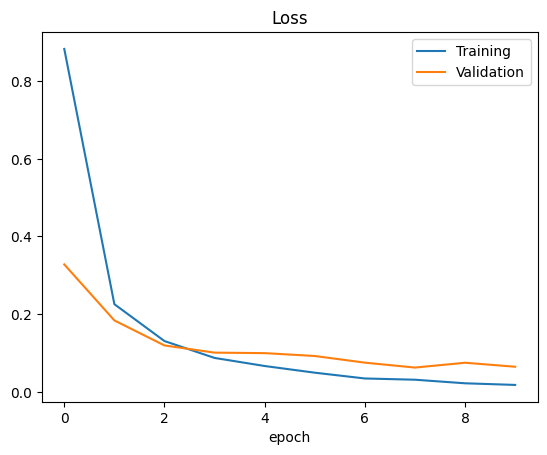

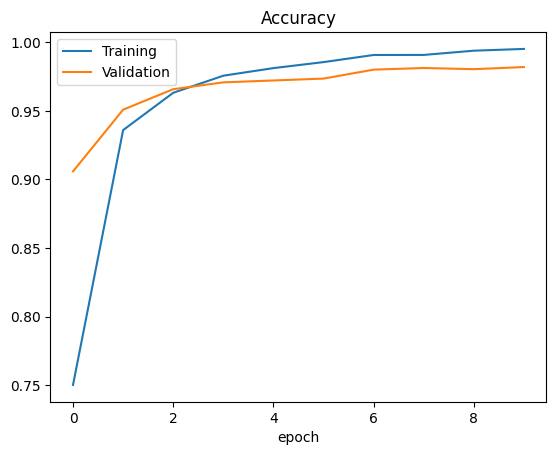

In [27]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title("Loss")
plt.xlabel("epoch")

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.show()

(28, 28, 1)

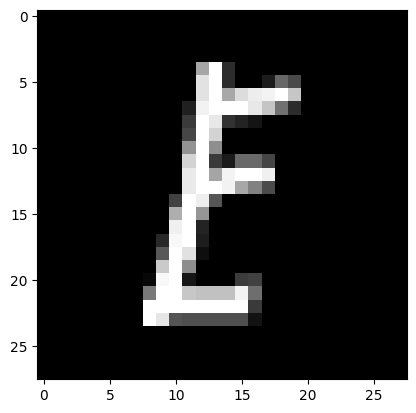

In [28]:
plt.imshow(X_data[4552], cmap='gray')
X_data[4552].shape

In [29]:
pred = model.predict(X_data[4552].reshape(1, 28, 28), verbose=0).argmax(axis=1)
output = list(string.ascii_uppercase)
output[pred[0]]

'E'